In [ ]:
import numpy as np

datafile = '../data/houseprice.data'
data = np.fromfile(datafile, sep = ' ')
data

In [ ]:
# 由于读入的原始数据是1维的，所有数据都连在一起。因此需要我们将数据的形状进行变换，形成一个2维的矩阵，
# 每行为一个数据样本（14个值），每个数据样本包含13个X（影响房价的特征）和一个Y（该类型房屋的均价）。

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_num = len(feature_names)
data.shape
data = data.reshape([data.shape[0] // feature_num , feature_num ])


In [ ]:
x = data[0]
print(x.shape)
print(x)

In [ ]:
# 将80%的数据用作训练集，20%用作测试集
print(data.shape)
ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]
testing_data = data[offset:]
training_data.shape,testing_data.shape

In [ ]:
# 每个特征进行归一化处理，使得每个特征的取值缩放到0~1之间。这样做有两个好处：
# 一是模型训练更高效，在本节的后半部分会详细说明；
# 二是特征前的权重大小可以代表该变量对预测结果的贡献度（因为每个特征值本身的范围相同）

# 计算train数据集的最大值，最小值

# axis = 0 表示收集齐所有第一个维度的数据，在这些数据中找到最大值，那实际上就是找出每一列的最大值
maximums, minimums = \
                     training_data.max(axis=0), \
                     training_data.min(axis=0)
# 对数据进行归一化处理
for i in range(feature_num):
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

In [4]:
import numpy as np
import json

In [8]:
# 将上述步骤进行封装为load_date方法
# 这个方法包括对数据的读入，对数据的预处理，数据的分类。
def load_data():
    # 从文件导入数据
    datafile = '../data/houseprice.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值
    maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)

    # 对数据进行归一化处理
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [11]:
# 获取数据
training_data, test_data = load_data()

# 将训练数据分为输入x，输出y
x = training_data[:, :-1]
y = training_data[:, -1:]

x[0],y[0]

(array([0.        , 0.18      , 0.07344184, 0.        , 0.31481481,
        0.57750527, 0.64160659, 0.26920314, 0.        , 0.22755741,
        0.28723404, 1.        , 0.08967991]),
 array([0.42222222]))

In [12]:
# 输入特征x有13个分量，y有1个分量，那么参数权重的形状（shape）是13×1

# 初始化参数
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, -0.1, -0.2, -0.3, -0.4, 0.0]
w = np.array(w).reshape([13, 1])

In [13]:
# 线性关系计算模拟

x1 = x[0]
y_hat = np.dot(x1, w)
y[0], y_hat

(array([0.42222222]), array([0.69474855]))

In [15]:
# 设置bias
b = -0.2
y_hat = y_hat + b
y[0], y_hat

(array([0.42222222]), array([0.29474855]))

In [16]:
# 将上述模型定义为神经网络类
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

In [17]:
net = Network(13)
x1 = x[0]
y1 = y[0]
z = net.forward(x1)
print(z)

[2.39362982]


In [18]:
# 损失函数
Loss = (y1 - z)*(y1 - z)
print(Loss)

[3.88644793]


In [20]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        return cost

In [21]:
net = Network(13)
# 此处可以一次性计算多个样本的预测值和损失函数
x1 = x[0:3]
y1 = y[0:3]
z = net.forward(x1)
print('predict: ', z)
loss = net.loss(z, y1)
print('loss:', loss)

predict:  [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss: 3.384496992612791


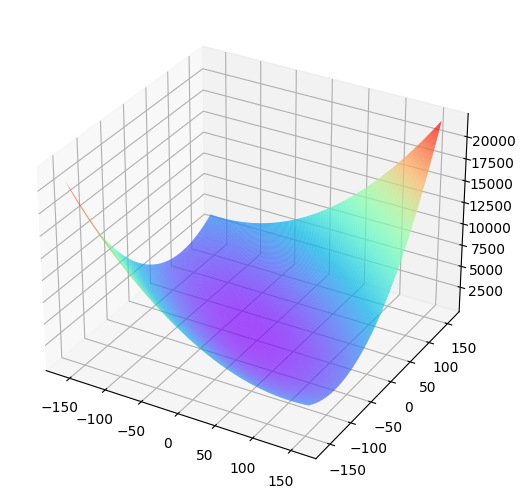

In [24]:
net = Network(13)
losses = []
#只画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1.0)
w9 = np.arange(-160.0, 160.0, 1.0)
losses = np.zeros([len(w5), len(w9)])

#计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

# 使用matplotlib将两个变量和对应的Loss作3D图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

# 如果您使用较新版本的matplotlib无法出图，可以替换为ax = fig.add_axes(Axes3D(fig))
ax = fig.add_axes(Axes3D(fig))

w5, w9 = np.meshgrid(w5, w9)

ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [25]:
# 梯度求解

x1 = x[0]
y1 = y[0]
z1 = net.forward(x1)
print('x1 {}, shape {}'.format(x1, x1.shape))
print('y1 {}, shape {}'.format(y1, y1.shape))
print('z1 {}, shape {}'.format(z1, z1.shape))

x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991], shape (13,)
y1 [0.42222222], shape (1,)
z1 [130.86954441], shape (1,)


损失函数为$L=1/2(y_i - z_i)^2$, 对于第一笔训练数据x1，y1，$L=1/2(x_1^0w_0+x_1^1w_1+...+x_1^12w_12+b-y_1)^2$

$w_0的梯度g=x_1^0(z_1-y_1)$

In [26]:
gradient_w0 = (z1 - y1) * x1[0]
print('gradient_w0 {}'.format(gradient_w0))

gradient_w0 [0.]


依次类推，我们就可以计算出第一笔训练数据下的所有参数的梯度

In [27]:
gradient_w = (z1 - y1) * x1
print('gradient_w_by_sample1 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample1 [  0.          23.48051799   9.58029163   0.          41.06674958
  75.33401592  83.69586171  35.11682862   0.          29.68425495
  37.46891169 130.44732219  11.69850434], gradient.shape (13,)


同样地方法，使用多批次的样本数据$x_2,y_2;x_3,y_3$,...,计算出各样本数据下各参数的梯度

In [28]:
x3samples = x[0:3]
y3samples = y[0:3]
z3samples = net.forward(x3samples)

print('x {}, shape {}'.format(x3samples, x3samples.shape))
print('y {}, shape {}'.format(y3samples, y3samples.shape))
print('z {}, shape {}'.format(z3samples, z3samples.shape))

x [[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.87519166e-01
  6.34657837e-02]], shape (3, 13)
y [[0.42222222]
 [0.36888889]
 [0.66      ]], shape (3, 1)
z [[130.86954441]
 [108.34434338]
 [131.3204395 ]], shape (3, 1)


In [29]:
gradient_w = (z3samples - y3samples) * x3samples
print('gradient_w {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w [[0.00000000e+00 2.34805180e+01 9.58029163e+00 0.00000000e+00
  4.10667496e+01 7.53340159e+01 8.36958617e+01 3.51168286e+01
  0.00000000e+00 2.96842549e+01 3.74689117e+01 1.30447322e+02
  1.16985043e+01]
 [2.54738434e-02 0.00000000e+00 2.83333765e+01 0.00000000e+00
  1.86624242e+01 5.91703008e+01 8.45121992e+01 3.76793284e+01
  4.69458498e+00 1.23980167e+01 5.97311025e+01 1.07975454e+02
  2.20777626e+01]
 [3.07963708e-02 0.00000000e+00 3.42860463e+01 0.00000000e+00
  2.25832858e+01 9.07287666e+01 7.83155260e+01 4.55955257e+01
  5.68088867e+00 1.50027645e+01 7.22802431e+01 1.29029688e+02
  8.29246719e+00]], gradient.shape (3, 13)


In [30]:
z = net.forward(x)
gradient_w = (z - y) * x
print('gradient_w shape {}'.format(gradient_w.shape))
print(gradient_w)

gradient_w shape (404, 13)
[[0.00000000e+00 2.34805180e+01 9.58029163e+00 ... 3.74689117e+01
  1.30447322e+02 1.16985043e+01]
 [2.54738434e-02 0.00000000e+00 2.83333765e+01 ... 5.97311025e+01
  1.07975454e+02 2.20777626e+01]
 [3.07963708e-02 0.00000000e+00 3.42860463e+01 ... 7.22802431e+01
  1.29029688e+02 8.29246719e+00]
 ...
 [3.97706874e+01 0.00000000e+00 1.74130673e+02 ... 2.01043762e+02
  2.48659390e+02 1.27554582e+02]
 [2.69696515e+01 0.00000000e+00 1.75225687e+02 ... 2.02308019e+02
  2.34270491e+02 1.28287658e+02]
 [6.08972123e+01 0.00000000e+00 1.53017134e+02 ... 1.76666981e+02
  2.18509161e+02 1.08772220e+02]]


算出了所有样本数据下各参数的梯度后， 对各个参数的梯度求平均和

In [31]:
# axis = 0，表示按照0个维度收集数据，并在收集的数据上进行操作
gradient_w = np.mean(gradient_w, axis=0)
print('gradient_w ', gradient_w.shape)
print('w ', net.w.shape)
print(gradient_w)
print(net.w)

gradient_w  (13,)
w  (13, 1)
[  4.6555403   19.35268996  55.88081118  14.00266972  47.98588869
  76.87210821  94.8555119   36.07579608  45.44575958  59.65733292
  83.65114918 134.80387478  38.93998153]
[[ 1.76405235e+00]
 [ 4.00157208e-01]
 [ 9.78737984e-01]
 [ 2.24089320e+00]
 [ 1.86755799e+00]
 [ 1.59000000e+02]
 [ 9.50088418e-01]
 [-1.51357208e-01]
 [-1.03218852e-01]
 [ 1.59000000e+02]
 [ 1.44043571e-01]
 [ 1.45427351e+00]
 [ 7.61037725e-01]]


In [32]:
# 解决维度不匹配的问题
# 这个问题是因为在作平均除法时，消除了第0维
gradient_w = gradient_w[:, np.newaxis]
print('gradient_w shape', gradient_w.shape)

gradient_w shape (13, 1)


In [33]:
# 参数b的梯度
gradient_b = (z - y)
gradient_b = np.mean(gradient_b)
# 此处b是一个数值，所以可以直接用np.mean得到一个标量
gradient_b

142.50289323156107

将训练过程进行封装

In [34]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        
        return gradient_w, gradient_b

In [39]:
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = Network(13)
# 设置[w5, w9] = [-100., -100.]
net.w[5] = -100.0
net.w[9] = -100.0

z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0],net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-100.0, -100.0], loss 7873.345739941161
gradient [-45.87968288123223, -35.50236884482904]


梯度更新

In [40]:
# 在[w5, w9]平面上，沿着梯度的反方向移动到下一个点P1
# 定义移动步长 eta
eta = 0.1
# 更新参数w5和w9
net.w[5] = net.w[5] - eta * gradient_w5
net.w[9] = net.w[9] - eta * gradient_w9
# 重新计算z和loss
z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-95.41203171187678, -96.4497631155171], loss 7214.694816482369
gradient [-43.883932999069096, -34.019273908495926]


封装Train函数

iter 9, loss 4310.864161925122
iter 19, loss 2308.6890716694215
iter 29, loss 1334.520063739553
iter 39, loss 859.2079939262751
iter 49, loss 626.0015612950967
iter 59, loss 510.320244395508
iter 69, loss 451.7144434044341
iter 79, loss 420.8517209952997
iter 89, loss 403.4981267934045
iter 99, loss 392.7457405004477
iter 109, loss 385.24137943955355
iter 119, loss 379.35671925203445
iter 129, loss 374.3004117057828
iter 139, loss 369.6872709519764
iter 149, loss 365.3292350159801
iter 159, loss 361.1339354241744
iter 169, loss 357.05547971369464
iter 179, loss 353.07056837697553
iter 189, loss 349.166904489287
iter 199, loss 345.3375679988511
iter 209, loss 341.5782842424955
iter 219, loss 337.8860968686263
iter 229, loss 334.25872228482336
iter 239, loss 330.6942348739396
iter 249, loss 327.19091278312493
iter 259, loss 323.74716170058014
iter 269, loss 320.3614765446834
iter 279, loss 317.03242161662615
iter 289, loss 313.75861977613636
iter 299, loss 310.5387460562577
iter 309, los

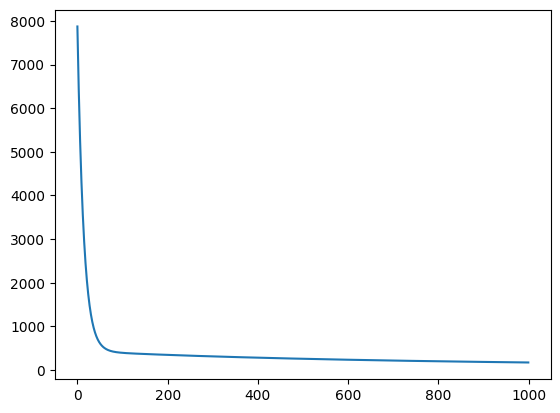

In [42]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights,1)
        self.w[5] = -100.
        self.w[9] = -100.
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)        
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        
    def train(self, x, y, iterations=100, eta=0.01):
        losses = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            if (i+1) % 10 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses

# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network(13)
num_iterations=1000
# 启动训练
losses = net.train(x, y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

随机梯度下降法（Stochastic Gradient Descent，SGD）

In [43]:
# 在上面的梯度更新阶段，使用全部的样本数据计算出的梯度平均后进行梯度的更新，
# 数据集非常大时，如果每次都使用全量数据进行计算，效率非常低
# mini-batch：每次迭代时抽取出来的一批数据被称为一个mini-batch。
# batch_size：一个mini-batch所包含的样本数目称为batch_size。
# epoch：当程序迭代的时候，按mini-batch逐渐抽取出样本，当把整个数据集都遍历到了的时候，则完成了一轮训练，也叫一个epoch。
# 启动训练时，可以将训练的轮数num_epochs和batch_size作为参数传入。

batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]
print('total number of mini_batches is ', len(mini_batches))
print('first mini_batch shape ', mini_batches[0].shape)
print('last mini_batch shape ', mini_batches[-1].shape)


total number of mini_batches is  41
first mini_batch shape  (10, 14)
last mini_batch shape  (4, 14)


In [44]:
# 为了达到随机抽取的效果，使用shuffle

# 新建一个array
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print('before shuffle', a)
np.random.shuffle(a)
print('after shuffle', a)

before shuffle [ 1  2  3  4  5  6  7  8  9 10 11 12]
after shuffle [ 7  2 11  3  8  6 12  1  4  5 10  9]


In [45]:
# 获取数据
train_data, test_data = load_data()

# 打乱样本顺序
np.random.shuffle(train_data)

# 将train_data分成多个mini_batch
batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]

# 创建网络
net = Network(13)

# 当所有mini——batch使用完成为，一个epoch，我们一共需要训练epoch次
# 依次使用每个mini_batch的数据
for mini_batch in mini_batches:
    x = mini_batch[:, :-1]
    y = mini_batch[:, -1:]
    loss = net.train(x, y, iterations=1)

In [ ]:
def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
    n = len(training_data)
    losses = []
    for epoch_id in range(num_epochs):
        # 在每轮迭代开始之前，将训练数据的顺序随机打乱
        # 然后再按每次取batch_size条数据的方式取出
        np.random.shuffle(training_data)
        # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
        mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
        # 每次使用一个minibatch进行参数的更新，看作是一次迭代。
        for iter_id, mini_batch in enumerate(mini_batches):
            #print(self.w.shape)
            #print(self.b)
            x = mini_batch[:, :-1]
            y = mini_batch[:, -1:]
            a = self.forward(x)
            loss = self.loss(a, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(loss)
            print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                format(epoch_id, iter_id, loss))

Epoch   0 / iter   0, loss = 1.0281
Epoch   0 / iter   1, loss = 0.5048
Epoch   0 / iter   2, loss = 0.6382
Epoch   0 / iter   3, loss = 0.5168
Epoch   0 / iter   4, loss = 0.1951
Epoch   1 / iter   0, loss = 0.6281
Epoch   1 / iter   1, loss = 0.4611
Epoch   1 / iter   2, loss = 0.4520
Epoch   1 / iter   3, loss = 0.3961
Epoch   1 / iter   4, loss = 0.1381
Epoch   2 / iter   0, loss = 0.5642
Epoch   2 / iter   1, loss = 0.4250
Epoch   2 / iter   2, loss = 0.4480
Epoch   2 / iter   3, loss = 0.3881
Epoch   2 / iter   4, loss = 0.1884
Epoch   3 / iter   0, loss = 0.3921
Epoch   3 / iter   1, loss = 0.5582
Epoch   3 / iter   2, loss = 0.3759
Epoch   3 / iter   3, loss = 0.3849
Epoch   3 / iter   4, loss = 0.1425
Epoch   4 / iter   0, loss = 0.3821
Epoch   4 / iter   1, loss = 0.4382
Epoch   4 / iter   2, loss = 0.3864
Epoch   4 / iter   3, loss = 0.4314
Epoch   4 / iter   4, loss = 0.0471
Epoch   5 / iter   0, loss = 0.4264
Epoch   5 / iter   1, loss = 0.3829
Epoch   5 / iter   2, loss =

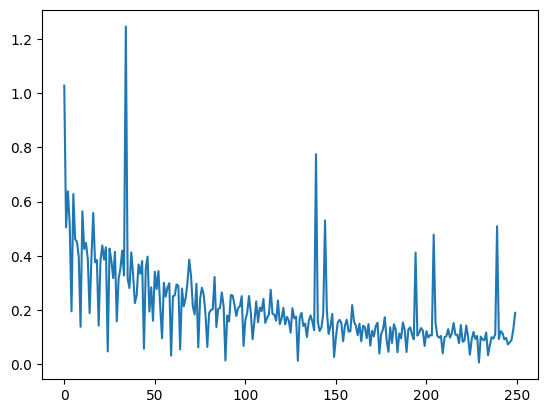

In [46]:
import numpy as np

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                 format(epoch_id, iter_id, loss))
        
        return losses

# 获取数据
train_data, test_data = load_data()

# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

模型保存

In [47]:
np.save('w.npy', net.w)
np.save('b.npy', net.b)